In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("swiggy_data.xlsx.csv")

In [5]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,29-06-25,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,03-04-25,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,15-01-25,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,17-04-25,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,13-03-25,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Order Date       197430 non-null  object 
 3   Restaurant Name  197430 non-null  object 
 4   Location         197430 non-null  object 
 5   Category         197430 non-null  object 
 6   Dish Name        197430 non-null  object 
 7   Price (INR)      197430 non-null  float64
 8   Rating           197430 non-null  float64
 9   Rating Count     197430 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 15.1+ MB


In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"],format = '%d-%m-%y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


In [9]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


In [10]:
df.duplicated().sum()

np.int64(27)

In [13]:
df.duplicated

<bound method DataFrame.duplicated of             State       City Order Date           Restaurant Name  \
0       Karnataka  Bengaluru 2025-06-29  Anand Sweets & Savouries   
1       Karnataka  Bengaluru 2025-04-03     Srinidhi Sagar Deluxe   
2       Karnataka  Bengaluru 2025-01-15     Srinidhi Sagar Deluxe   
3       Karnataka  Bengaluru 2025-04-17     Srinidhi Sagar Deluxe   
4       Karnataka  Bengaluru 2025-03-13     Srinidhi Sagar Deluxe   
...           ...        ...        ...                       ...   
197425     Sikkim    Gangtok 2025-01-25            Mama's Kitchen   
197426     Sikkim    Gangtok 2025-07-02            Mama's Kitchen   
197427     Sikkim    Gangtok 2025-03-25            Mama's Kitchen   
197428     Sikkim    Gangtok 2025-03-26            Mama's Kitchen   
197429     Sikkim    Gangtok 2025-03-27            Mama's Kitchen   

                    Location     Category  \
0       Rajarajeshwari Nagar        Snack   
1                    Kengeri  Recommended  

In [9]:
df.drop_duplicates(keep = 'first',inplace = True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
#. Minimum and maximum dish price
df['Price (INR)'].min(),df['Price (INR)'].max()

(np.float64(0.95), np.float64(8000.0))

In [12]:
#total unique retaurants
df['Restaurant Name'].nunique()

993

In [13]:
#top 5 highest-priced dishes
df.sort_values(by = 'Price (INR)', ascending = False).head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
54940,Uttar Pradesh,Lucknow,2025-05-15,Madhurima Veg,Ashiyana,PARTY SPECIALS,Choley Bhature Classic Combo (for 20),8000.0,4.4,0
54943,Uttar Pradesh,Lucknow,2025-06-10,Madhurima Veg,Ashiyana,PARTY SPECIALS,Special Deluxe Thali Feast (for 15),7725.0,4.4,0
54939,Uttar Pradesh,Lucknow,2025-08-13,Madhurima Veg,Ashiyana,PARTY SPECIALS,Choley Bhature Classic Combo (for 15),6000.0,4.4,0
54942,Uttar Pradesh,Lucknow,2025-07-22,Madhurima Veg,Ashiyana,PARTY SPECIALS,Special Deluxe Thali Feast (for 10),5400.0,4.4,0
33890,Telangana,Hyderabad,2025-07-24,Bikanervala,aramghar,Party Menu for 10pax,Party Menu Plan I,4799.0,4.4,0


In [14]:
#Check missing values
df.isna().sum()

State              0
City               0
Order Date         0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

In [15]:
#Get price distribution (value counts)
df['Price (INR)'].value_counts().head()

Price (INR)
299.0    4940
199.0    4363
249.0    3364
99.0     3231
259.0    2714
Name: count, dtype: int64

**Data Visualization**

*Bar Chart – Total Revenue by Top 10 Restaurant*

In [16]:
df.head(1)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0


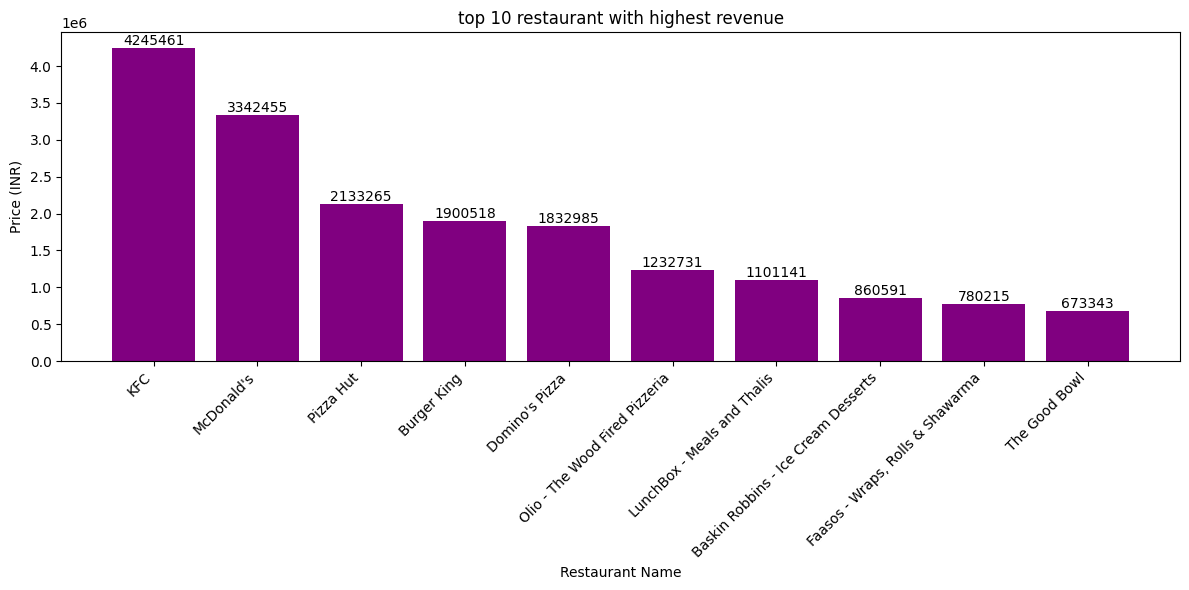

In [17]:
revenue_restaurant = df.groupby('Restaurant Name')['Price (INR)'].sum()
top_10 = revenue_restaurant.sort_values(ascending = False).head(10)

plt.figure(figsize = (12,6))
bars = plt.bar(top_10.index, top_10.values , color = 'purple')
plt.title('top 10 restaurant with highest revenue')
plt.xlabel('Restaurant Name')
plt.ylabel('Price (INR)')
plt.xticks(rotation = 45, ha = 'right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

*Number of Orders Per Category(top 10)*

In [18]:
df.head(5)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


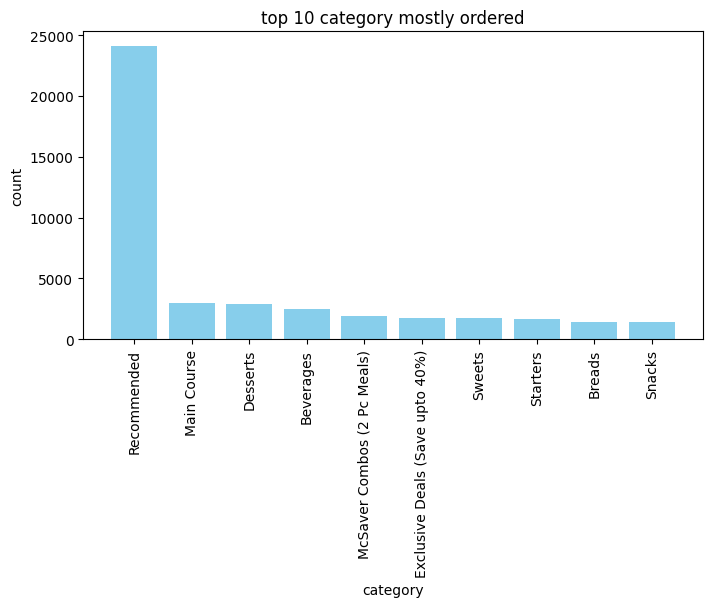

In [19]:
orders_category = df['Category'].value_counts().head(10)

plt.figure(figsize = (8,4))
plt.bar(orders_category.index, orders_category.values, color = 'skyblue')
plt.title('top 10 category mostly ordered')
plt.xlabel('category')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()


*Orders per state*

In [20]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


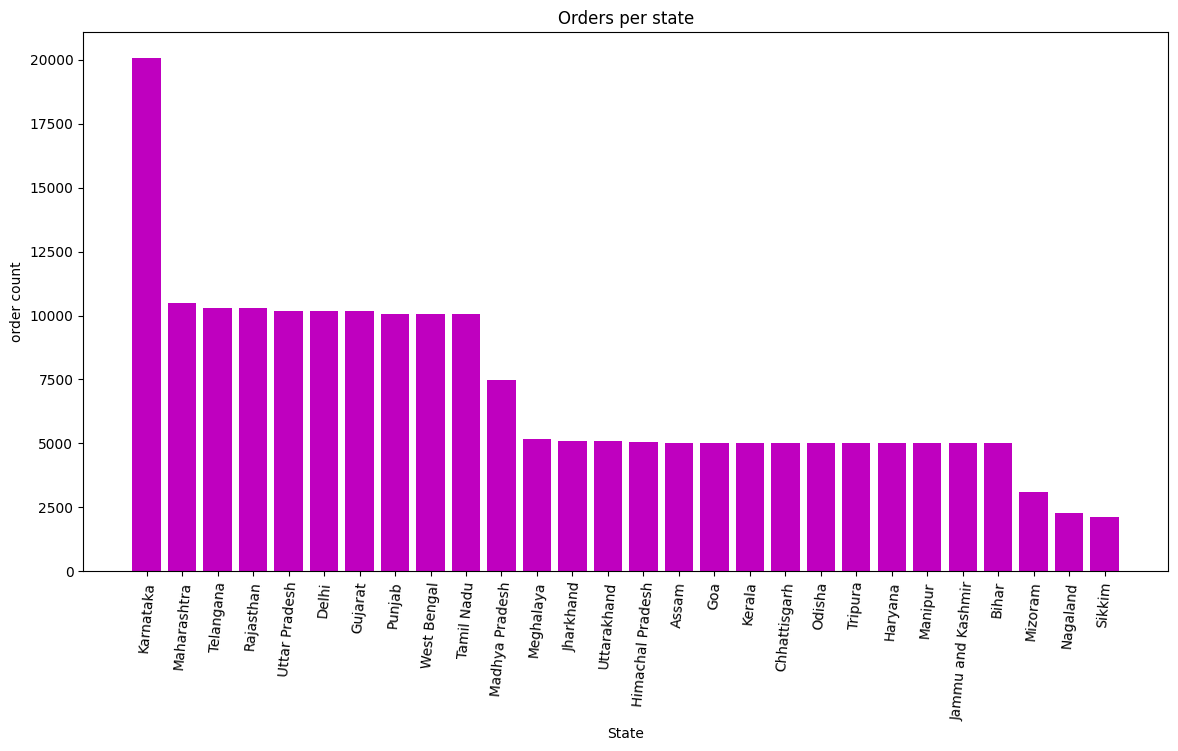

In [21]:
orders_state = df['State'].value_counts()

plt.figure(figsize = (14,7))
plt.bar(orders_state.index ,orders_state.values, color = 'm')
plt.title('Orders per state')
plt.xlabel('State')
plt.ylabel('order count')
plt.xticks(rotation = 85)
plt.show()


*Pie Chart - Top Five Dishes*

In [22]:
df.head(3)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48


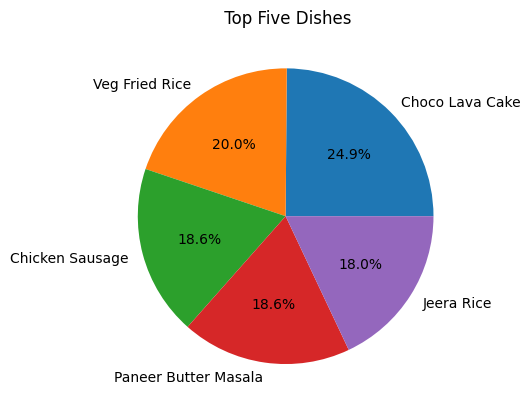

In [23]:
top5_dishes = df['Dish Name'].value_counts().head(5)

plt.pie(top5_dishes.values , labels = top5_dishes.index , autopct = '%1.1f%%')
plt.title(' Top Five Dishes')
plt.show()

*to create a new column for rating category and then get the bar graph data for states with Low, Moderate, and High ratings*

In [24]:
def rating_category (x):
    if x < 3:
        return "low"
    elif 3 <= x < 4:
        return "moderate"
    else:
        return "high"

df['rating_category'] = df['Rating'].apply(rating_category)


In [25]:
df.head(10)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count,rating_category
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0,high
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25,high
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48,high
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65,high
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0,high
5,Karnataka,Bengaluru,2025-07-08,Srinidhi Sagar Deluxe,Kengeri,Recommended,Srinidhi Sagar Special,312.0,4.0,0,high
6,Karnataka,Bengaluru,2025-01-21,Srinidhi Sagar Deluxe,Kengeri,Recommended,Garlic Naan,98.0,4.0,34,high
7,Karnataka,Bengaluru,2025-04-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Pista,137.0,4.0,0,high
8,Karnataka,Bengaluru,2025-05-02,Srinidhi Sagar Deluxe,Kengeri,North Indian Gravy,Panneer Butter Masala,241.0,4.4,29,high
9,Karnataka,Bengaluru,2025-07-30,Srinidhi Sagar Deluxe,Kengeri,North Indian Gravy,Dal Tadka,195.0,4.9,51,high


In [26]:
#Group by State and Rating Category

In [27]:
state_rating_category = df.groupby(['State','rating_category']).size().reset_index(name = "count")

In [28]:
print(state_rating_category)

          State rating_category  count
0         Assam            high   4565
1         Assam             low     74
2         Assam        moderate    393
3         Bihar            high   4357
4         Bihar             low     81
..          ...             ...    ...
79  Uttarakhand             low     96
80  Uttarakhand        moderate    486
81  West Bengal            high   9147
82  West Bengal             low    125
83  West Bengal        moderate    772

[84 rows x 3 columns]


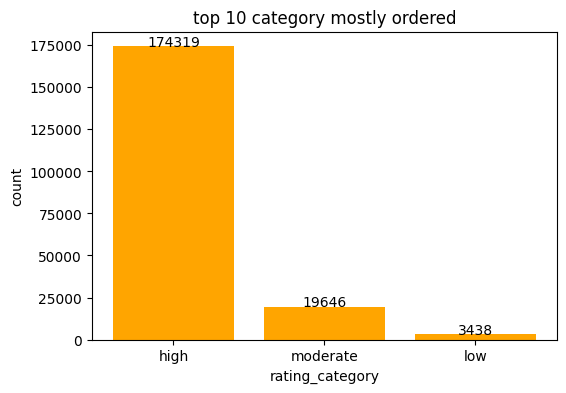

In [29]:
rating_category = df['rating_category'].value_counts()

plt.figure(figsize = (6,4))
plt.bar(rating_category.index, rating_category.values, color = 'orange')
for i, value in enumerate(rating_category.values):
   plt.text(i, value + 0.9 , str(value),ha = 'center')

plt.title('top 10 category mostly ordered')
plt.xlabel('rating_category')
plt.ylabel('count')
plt.show()

**Line Chart – Daily Revenue Trend**

In [30]:
df.head(2)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count,rating_category
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0,high
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25,high


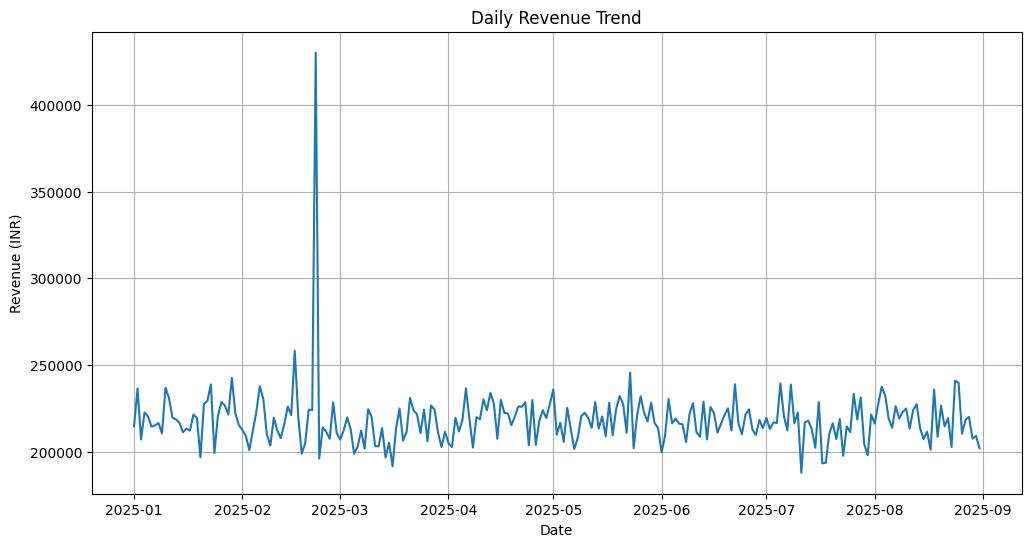

In [31]:
daily_sales = df.groupby("Order Date")["Price (INR)"].sum()

plt.figure(figsize=(12,6))
plt.plot(daily_sales)
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.show()


#*Monthly Sales Trend*#

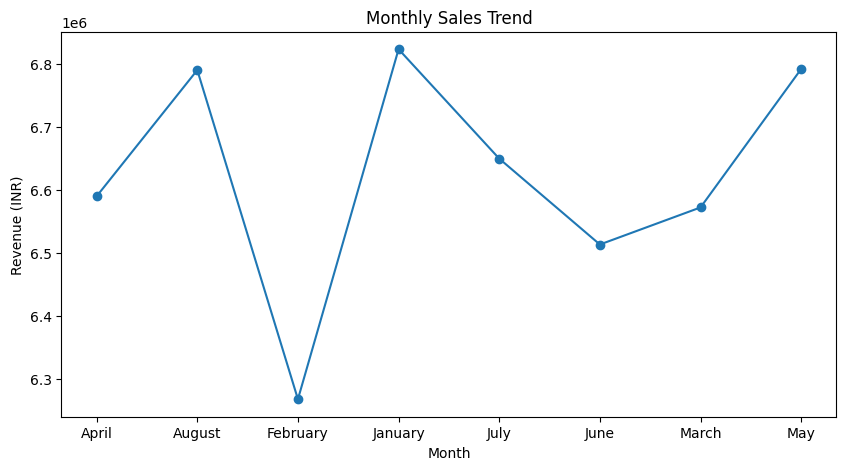

In [38]:
df['Month'] = df['Order Date'].dt.month_name()
monthly_sales = df.groupby('Month')['Price (INR)'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.show()


***HeatMap***

In [33]:
df.columns

Index(['State', 'City', 'Order Date', 'Restaurant Name', 'Location',
       'Category', 'Dish Name', 'Price (INR)', 'Rating', 'Rating Count',
       'rating_category', 'Month'],
      dtype='object')

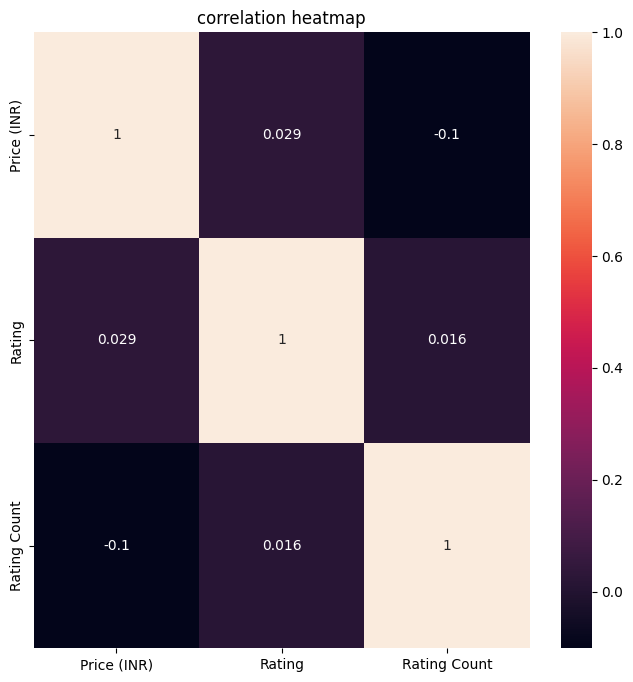

In [34]:
corr = df[['Price (INR)', 'Rating', 'Rating Count']].corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot= True)
plt.title("correlation heatmap")
plt.show()

**order per restaurant(top_5) vs months**

In [39]:
df.head(3)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count,rating_category,Month
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0,high,June
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25,high,April
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48,high,January


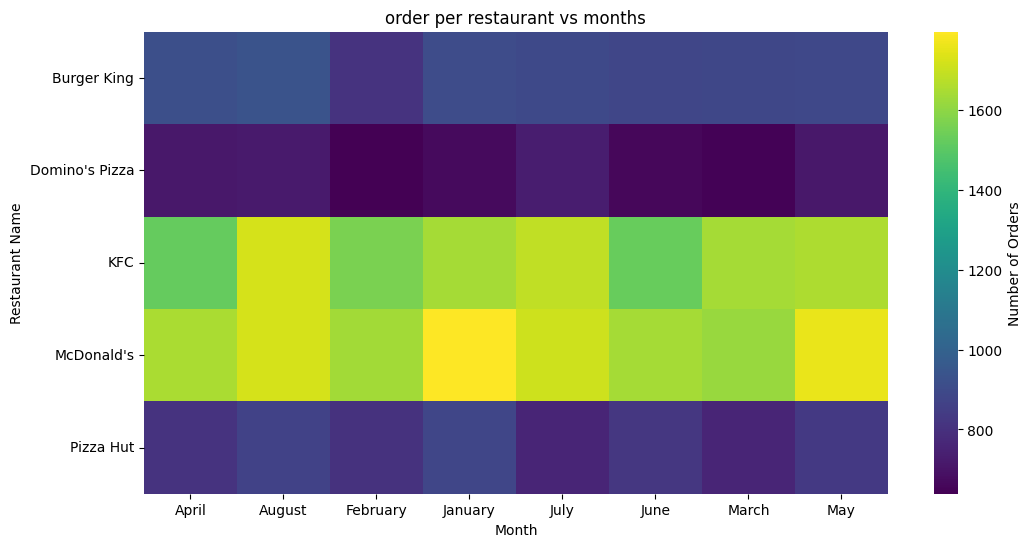

In [53]:
top_5 = df['Restaurant Name'].value_counts().head(5).index

rest_mon = pd.pivot_table(df[df['Restaurant Name'].isin(top_5)],
                          index = 'Restaurant Name',
                          columns = 'Month',
                          values = 'Price (INR)',
                          aggfunc = 'count')

plt.figure(figsize  = (12,6))
sns.heatmap(rest_mon, cmap = "viridis", cbar = True, cbar_kws={'label': 'Number of Orders'} )
plt.title('order per restaurant vs months')
plt.show()


**top 10 dishes vs Cities(top_10) (Order Count)**

In [55]:
df.head(5)

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count,rating_category,Month
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0,high,June
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25,high,April
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48,high,January
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65,high,April
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0,high,March


In [59]:
city_top10 = df['City'].value_counts().head(10).index
dish_top10 = df['Dish Name'].value_counts().head(10).index

filtered_df = df[(df['City'].isin(city_top10)) & (df['Dish Name'].isin(dish_top10))]

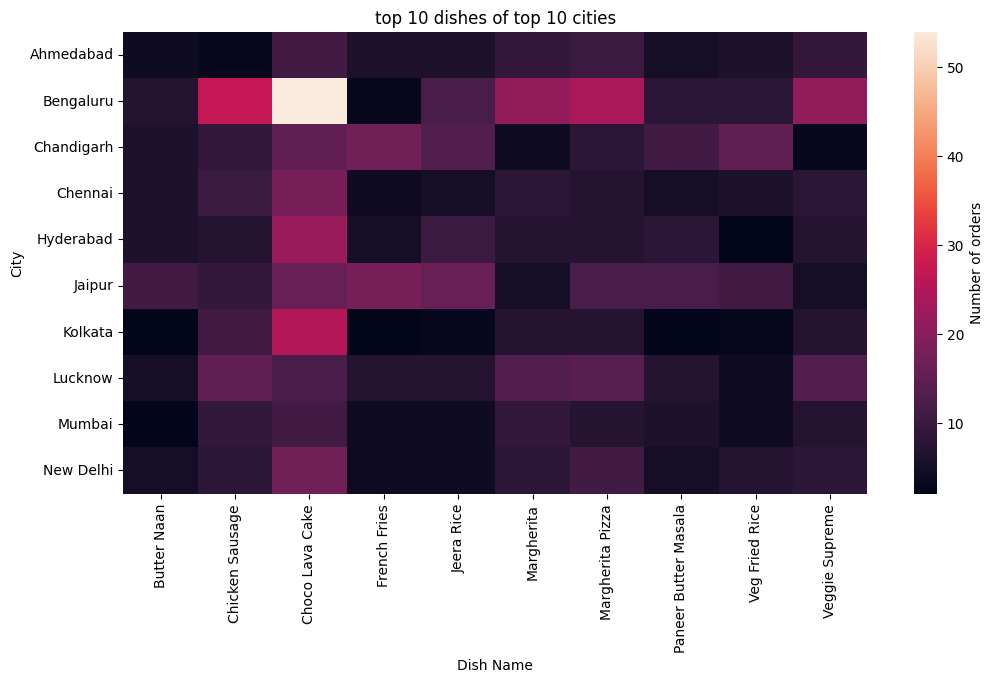

In [62]:
cities_dish = pd.pivot_table(filtered_df,
                             index = 'City',
                             columns = 'Dish Name',
                             values = 'Price (INR)',
                             aggfunc = 'count')
plt.figure(figsize = (12,6))
sns.heatmap(cities_dish,
            cbar = True,
            cbar_kws = {'label':'Number of orders'})
plt.title('top 10 dishes of top 10 cities')
plt.show()
            

                             

**Top 5 cities by order count-pie chart**

In [67]:
top5_cities = df['City'].value_counts().head(5)

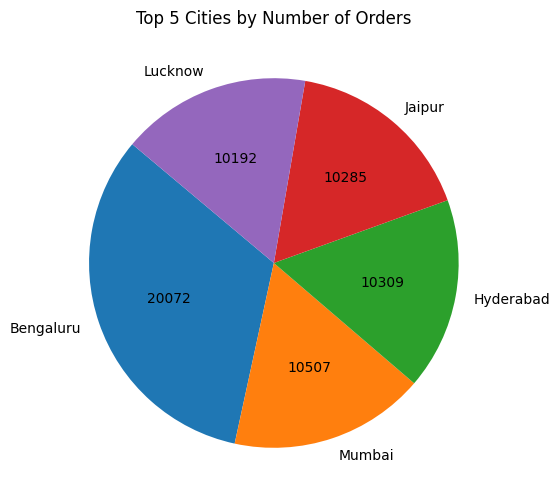

In [71]:
plt.figure(figsize = (6,6))
plt.pie(top5_cities, labels = top5_cities.index,autopct = lambda pct: f'{int(round(pct/100 * sum(top5_cities)))}',startangle = 140)
plt.title("Top 5 Cities by Number of Orders")
plt.show()

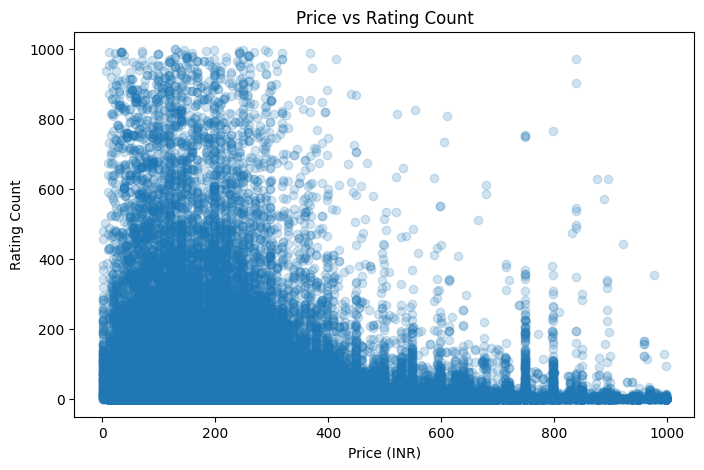

In [76]:
filtered = df[df['Price (INR)'] < 1000]
plt.figure(figsize=(8,5))
plt.scatter(filtered['Price (INR)'], filtered['Rating Count'],alpha = 0.2 )
plt.title("Price vs Rating Count")
plt.xlabel("Price (INR)")
plt.ylabel("Rating Count")
plt.show()
